# Alejandro Jesús Manotas Marmolejo
# Código: 200108289

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [49]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Distribution for Running Data Analysis
from scipy.stats import poisson

#Model imports
from sklearn.naive_bayes import GaussianNB

#Model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

# 1. Running data analysis

In [37]:
#Read CSV
runkeeper_data = pd.read_csv('/content/drive/MyDrive/Runkeeper_data.csv')
runkeeper_data.head()

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


In [38]:
#Erasing columns we don't need
runkeeper_data = runkeeper_data.drop(columns=['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes'])
runkeeper_data.head()

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
0,2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130,159.0
1,2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168,159.0
2,2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,171,155.0
3,2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,169,158.0
4,2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,170,154.0


In [40]:
# Erase nan rows
runkeeper_data.dropna(subset = ['Type','Distance (km)', 'Duration', 'Average Pace', 'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)'], axis=0,inplace=True)

## Visualizing data

In [41]:
#Convert duration from type string to integer, duration is gonna in seconds
def convert_to_seconds(duration):
  duration = duration.split(':')
  minutes = 0
  if len(duration) == 3:
    minutes = minutes + (int(duration[0]) * 60)
    seconds = minutes + int(duration[1])
    minutes = minutes + (int(duration[2]) / 60)
  else:
    minutes = minutes + int(duration[0])
    minutes = minutes + (int(duration[1]) / 60)
  return minutes

runkeeper_data.loc[:, 'Duration'] = runkeeper_data['Duration'].apply(lambda duration: convert_to_seconds(duration))

In [42]:
#Show data if it done it correctly
runkeeper_data.head()

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
0,2018-11-11 14:05:12,Running,10.44,58.666667,5:37,10.68,130,159.0
1,2018-11-09 15:02:35,Running,12.84,60.200000,5:47,10.39,168,159.0
2,2018-11-04 16:05:00,Running,13.01,60.266667,5:47,10.37,171,155.0
3,2018-11-01 14:03:58,Running,12.98,60.416667,5:44,10.47,169,158.0
4,2018-10-27 17:01:36,Running,13.02,60.833333,5:36,10.73,170,154.0


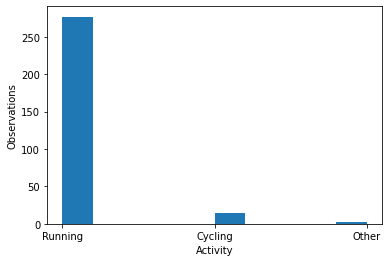

In [45]:
#Histogram based on type of activity
type_hist = plt.hist(runkeeper_data['Type'])
type_hist = plt.xlabel('Activity')
type_hist = plt.ylabel('Observations')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

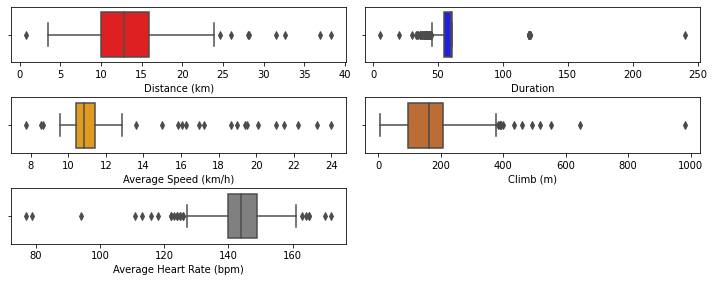

In [44]:
r = plt.figure(figsize=(10,4))

#Distance (km) boxplot
r.add_subplot(3,2,1)
sns.boxplot(runkeeper_data['Distance (km)'],color='red')
plt.tight_layout(pad=1,h_pad=0.4)

#Duration boxplot
r.add_subplot(3,2,2)
sns.boxplot(runkeeper_data['Duration'],color='blue')
plt.tight_layout(pad=1,h_pad=0.4)

#Average Speed (km/h) boxplot
r.add_subplot(3,2,3)
sns.boxplot(runkeeper_data['Average Speed (km/h)'],color='orange')
plt.tight_layout(pad=1,h_pad=0.4)

#Climb (m) boxplot
r.add_subplot(3,2,4)
sns.boxplot(runkeeper_data['Climb (m)'],color='chocolate')
plt.tight_layout(pad=1,h_pad=0.4)

#Average Heart Rate (bpm) boxplot
r.add_subplot(3,2,5)
sns.boxplot(runkeeper_data['Average Heart Rate (bpm)'],color='gray')
plt.tight_layout(pad=1,h_pad=0.4)

plt.show()

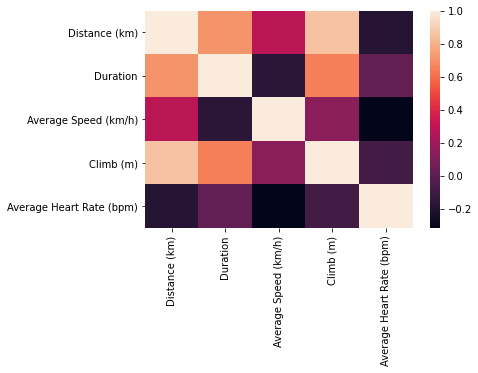

In [46]:
#Heatmap
sns.heatmap(runkeeper_data.corr())
plt.show()

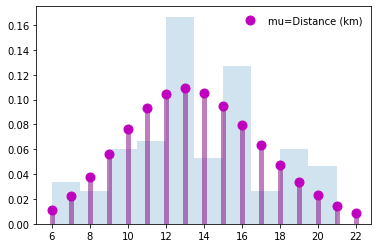

In [50]:
#Expected value vs Observed value
#Create figure
fig, ax = plt.subplots(1, 1)

#Parameters for distribution
mu = runkeeper_data['Distance (km)'].mean()

#Generate the discrete random variables
x = np.arange(poisson.ppf(0.01,mu), poisson.ppf(0.99,mu))

#Plotting x
ax.plot(x, poisson.pmf(x,mu), 'mo', ms=9, label='mu=Distance (km)')
ax.vlines(x, 0, poisson.pmf(x,mu), colors='purple', lw=5, alpha=0.5)

#Generate random numbers and plotting
x_rv = poisson.rvs(mu, size=100)
ax.hist(x_rv, density=True, alpha=0.2)

#Define legends of the attributes
ax.legend(loc='upper right', frameon=False)
plt.show()

## Data analysis

### Cual es la probabilidad de correr una distancia de 10 km?

In [51]:
#Probability to run 10km
print(poisson.pmf(10,mu))

0.07589751038167286


### Cual es la probabilidad de correr una distancia mayor a de 15 km?

In [54]:
#Probability to run more than 15km
more_than_15_km = 0
for i in range (0,16):
    more_than_15_km = poisson.pmf(i,mu) + more_than_15_km
print(1 - more_than_15_km)

0.2825191136083811


# 2. COVID-19 Mobil Testing/Vaccinations sites

# 3. Transit accidents severity

In [ ]:
#Read csv
accident_data = pd.read_csv('/content/drive/MyDrive/US_Accidents_Dec20_Updated.csv')
accident_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
#Factorize weather condition data
accident_data['Weather_Condition'],weather_data = pd.factorize(accident_data['Weather_Condition'])

#Selecting the columns we need
accidents = accident_data.loc[:, ['Temperature(F)', 'Humidity(%)','Pressure(in)','Visibility(mi)','Precipitation(in)', 'Weather_Condition', 'Severity']].dropna()

In [ ]:
#See if the dataframe is correct
accidents

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Precipitation(in),Weather_Condition,Severity
0,76.0,52.0,28.91,10.0,0.00,0,2
1,76.0,62.0,29.30,10.0,0.00,1,2
2,51.0,80.0,30.17,10.0,0.00,0,2
6,28.0,88.0,24.67,2.0,0.00,4,4
7,55.0,40.0,29.86,10.0,0.00,0,2
...,...,...,...,...,...,...,...
2906600,77.0,65.0,28.98,7.0,0.00,5,2
2906602,45.0,81.0,29.54,0.5,0.00,11,2
2906604,77.0,96.0,29.92,10.0,0.01,1,2
2906607,76.0,85.0,30.00,10.0,0.00,5,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

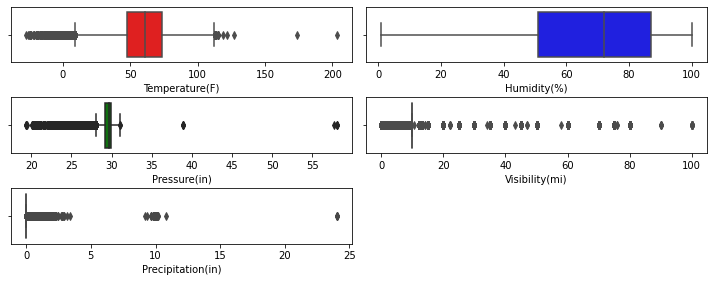

In [ ]:
f = plt.figure(figsize=(10,4))

#Temperature boxplot
f.add_subplot(3,2,1)
sns.boxplot(accidents['Temperature(F)'],color='red')
plt.tight_layout(pad=1,h_pad=0.4)

#Humidity boxplot
f.add_subplot(3,2,2)
sns.boxplot(accidents['Humidity(%)'],color='blue')
plt.tight_layout(pad=1,h_pad=0.4)

#Pressure boxplot
f.add_subplot(3,2,3)
sns.boxplot(accidents['Pressure(in)'],color='green')
plt.tight_layout(pad=1,h_pad=0.4)

#Visibility boxplot
f.add_subplot(3,2,4)
sns.boxplot(accidents['Visibility(mi)'],color='orange')
plt.tight_layout(pad=1,h_pad=0.4)

#Precipitation boxplot
f.add_subplot(3,2,5)
sns.boxplot(accidents['Precipitation(in)'],color='chocolate')
plt.tight_layout(pad=1,h_pad=0.4)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

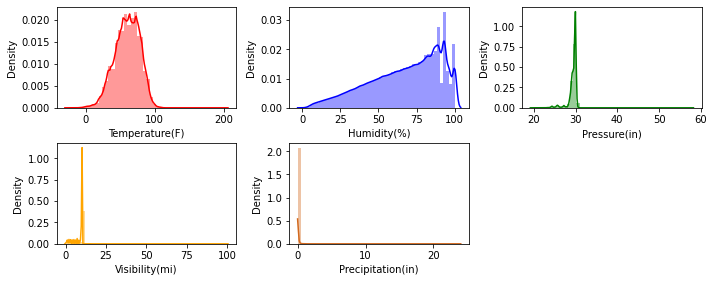

In [ ]:
f2 = plt.figure(figsize=(10,4))

#Temperature distplot
f2.add_subplot(2,3,1)
sns.distplot(accidents['Temperature(F)'],color='red')
plt.tight_layout(pad=1,h_pad=0.4)

#Humidity distplot
f2.add_subplot(2,3,2)
sns.distplot(accidents['Humidity(%)'],color='blue')
plt.tight_layout(pad=1,h_pad=0.4)

#Pressure distplot
f2.add_subplot(2,3,3)
sns.distplot(accidents['Pressure(in)'],color='green')
plt.tight_layout(pad=1,h_pad=0.4)

#Visibility distplot
f2.add_subplot(2,3,4)
sns.distplot(accidents['Visibility(mi)'],color='orange')
plt.tight_layout(pad=1,h_pad=0.4)

#Precipitation distplot
f2.add_subplot(2,3,5)
sns.distplot(accidents['Precipitation(in)'],color='chocolate')
plt.tight_layout(pad=1,h_pad=0.4)

plt.show()

In [ ]:
#Using Naive Bayes model
nb = GaussianNB()

#Split data into features and outputs
X = accidents.drop(columns=['Severity'])
Y = accidents['Severity']

#Split data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state=4)

#Training the model
nb.fit(X_train,Y_train)

#Predict testing set
Y_pred = nb.predict(X_test)

#Check performance of model
print("Accuracy:",accuracy_score(Y_test,Y_pred))
#Model precision
print("Precision:",precision_score(Y_test,Y_pred , average='micro'))

Accuracy: 0.7472903791891021
Precision: 0.7472903791891021
